# Lesson 4: Plotting mercury concentrations with ggplot 

We want to first visualize the amount of mercury in *all* the fish, or a distribution of the mercury data.

If you run the code chunk below, it will make a graph of all the 1998 mercury data. We want to see the distributions of mercury in the fish to learn how common it is for fish to have mercury levels above the EPA's recommended safe level.

This code has a lot of details that we will work through later. For now, you can either just run the code chunk (by clicking the small green arrow in the upper right corner of the grey area), or you can explore the code line by line. We've provided some comments to help you out. [This cheatsheet](https://images.datacamp.com/image/upload/v1666806657/Marketing/Blog/ggplot2_cheat_sheet.pdf) will also give you some tips. 

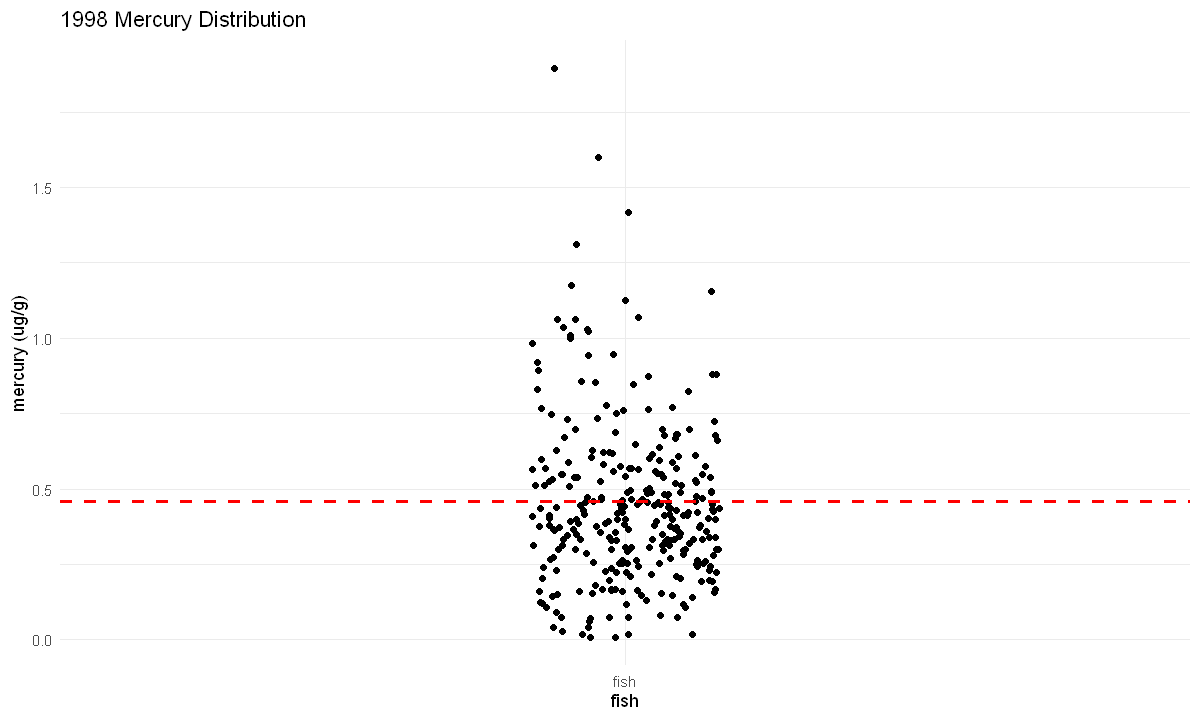

In [2]:
# reload data 
fish_1998 <- read.csv("fish_1998.csv", header = TRUE, sep = ',')
# load packages 
library(ggplot2) 
library(knitr)
# change settings for plots to show up 
options(repr.plot.width = 10, repr.plot.height = 6)


#For this plot, we want to see the distributions of mercury in the fish and how many of them are above the EPA's recommended levels
#ggplot is the function that we are using to create a plot. aes() is used to tell ggplot what we want to see on each axis, in this case x= 'fish' and y= mercury. x="fish" indicates that the x axis doesn't have a variable and is titled fish. This allows us to look at the variation in lengths of fish independent of another variable.
ggplot (fish_1998, aes(x= 'fish', y= mercury))+
#Since ggplot is just a function to create plots, we need to further specify what kind of plot it should create. We can do this by using the geom_jitter function, which will create the jitter plot seen below. We can also add a few more parameters to the graph, such as changing the width of the points (width = 0.1).
#The jitter plot is a variation on the scatterplot, but it separates the data so that we can distinguish how many points are above the unsafe mercury level. To see the difference, try geom_point() and then geom_jitter()
  geom_jitter(width = 0.1)+
#We can also add shapes to the plot. Here we added a line to show where  the EPA's guideline for unsafe levels of mercury in fish would fall. To create  this we used the geom_hline() function which simply creates a horizontal line at a y-intercept that you set. We can also adjust the color and appearance of the line with color = 'red'.  
  geom_hline(yintercept = 0.46, linetype= "dashed", color= "red", linewidth=1)+
#This allows us to relabel the x-axis
  xlab("fish")+
#This allows us to relabel the y-axis
  ylab("mercury (ug/g)")+
#This allows us to title the graph
  ggtitle("1998 Mercury Distribution")+
#This adjusts the non-data components of the plot, so the titles, labels, background, and legends among other aspects. 
  theme_minimal()

🧠✍️ **Class question:**

* What does this distribution tell us about the mercury levels in the fish? 

## Boxplots: distribution of 1 variable 

Next, Look back at the min, max, median, and mean values that were calculated above. Where would these values fall on this graph? Are the mean and median values above or below the level suggested by the EPA?

We can overlay a "boxplot" on the previous scatter plot. Boxplots are a way to show the mean, quartiles, minimum and maximum of a distribution. You can google "boxplot" to learn more.

Like last time, you can just run this code if you want. We want to focus on the results. However, we've provided comments to help you understand each line of the code, if you want. 

If you want to customize the plot, try changing the color inside `geom_boxplot()` or `geom_hline()` to one from this [list](https://r-charts.com/colors/).

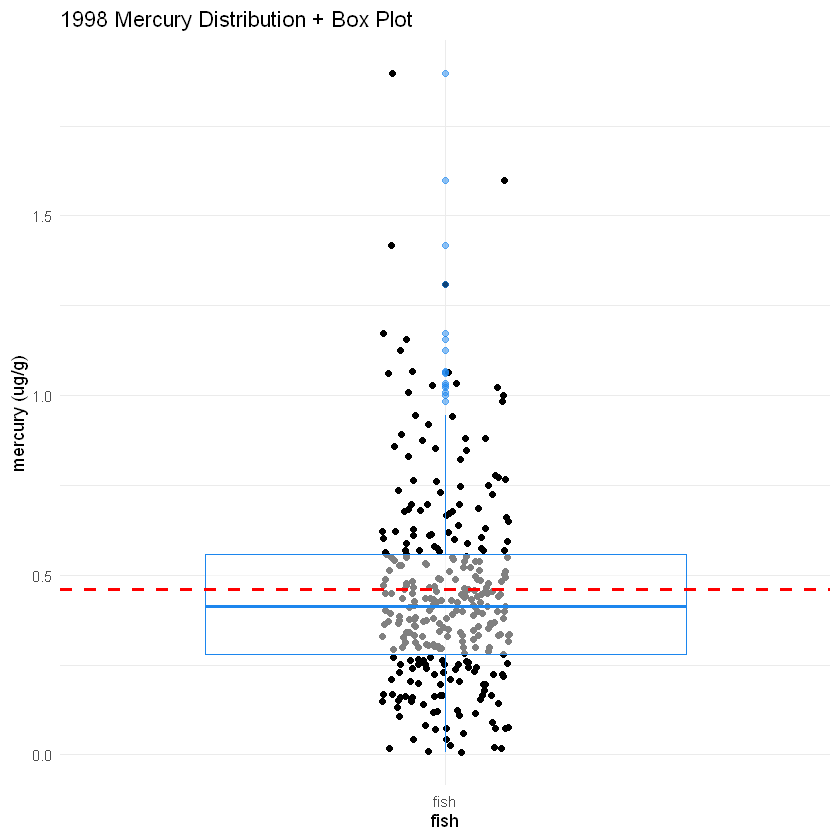

In [4]:
# These lines are almost the same as the last code chunk, 
# but we added a '+' at the end, to add some new pieces to the graph.
ggplot (fish_1998, aes(x= 'fish', y= mercury))+
geom_jitter(width = 0.1)+
# We will overlay a boxplot on the jitter plot. 
# We can adjust its color as we did above,
# We use alpha, to adjust the opacity of the boxplot.
# This lets us see the jitter plot beneath it.
geom_boxplot(alpha=0.5, color="dodgerblue2")+
# As before, we add a line to represent the EPA's recommended safe mercury ingestion level
geom_hline(yintercept = 0.46, linetype= "dashed", color= "red", size=1)+
# The rest of the code is the same as the last code chunk:
  xlab("fish")+
  ylab("mercury (ug/g)")+
  ggtitle("1998 Mercury Distribution + Box Plot")+
theme_minimal()

You have now seen what the mercury distribution in local fish looks like and connected it to the summary statistics that were calculated above!

🧠✍️ **Class Questions:**

* From looking at this graph, are there unsafe levels of mercury in local fish? 
  If so, is it in most fish, or only some? Did this graph tell you anything different than the summary statistics, or did it just tell you the same information in a different way?
* In 1998, was it safe for members of the K'avi community to eat fish from these waters?
* How comfortable would you have been in 1998 about eating a fish that you caught?

## Scatterplots: relationship between 2 variables 

Mercury is known to build up in fish as they age: The oldest fish tend to have the highest levels of mercury. Older fish also tend to be bigger, so maybe if we know the relationship between fish size and fish mercury levels, that could give us useful guidance for which fish were safe to eat back in 1998.  

We'll make another graph of the same dataset. This time we'll make a scatterplot of both the mercury level and the length of each fish. A scatterplot shows the data as points in two dimensions (fish length and mercury content, here). 

Again, you can just run the code (with the green arrow), but we've also provided comments to help you learn how it works. Our goal here is to let you see the kings of graphs you can make in R and to help interpret the safety of the fish from 1998.

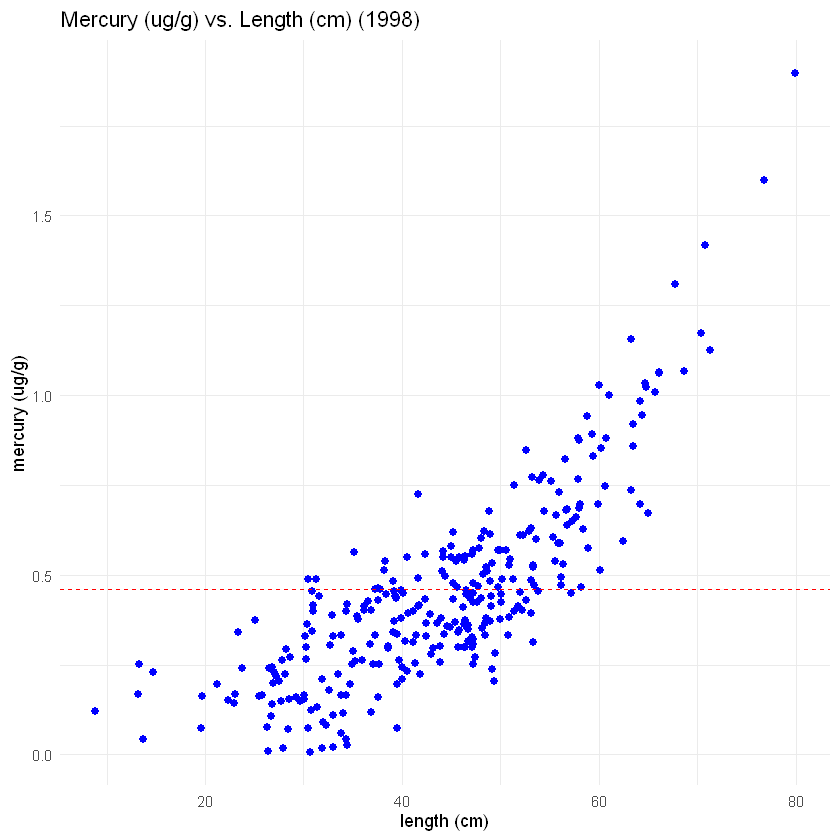

In [5]:
# This line defines a plot, called 'LengthMercury1998', as a ggplot(). 
# The ggplot() code is a little different from the single variable boxplot.
# Now, we are plotting two columns of the dataset: 
# length will be on the (horizontal) x-axis
# mercury will be on the (vertical) y-axis
LengthMercury1998 <- ggplot(fish_1998, aes(x = length, y = mercury)) +
# geom_point() makes a scatterplot.
# We are going to plot the data points in blue 
# and a little bigger than the default "size = 2"
  geom_point(color = 'blue', size = 2) +
# Now we're going to write labels for the two axes, and give the graph a title
  xlab("length (cm)")+
  ylab("mercury (ug/g)")+
  ggtitle("Mercury (ug/g) vs. Length (cm) (1998)")+
# As before, we will add a line to represent the EPA's recommended mercury level
# This time, we'll make a red dashed line.
  geom_hline(yintercept = 0.46, linetype= "dashed", color = 'red')+
# We'll use the same theme as last time.
  theme_minimal()


#Because we assigned the graph a label, we have to call that label
LengthMercury1998

🧠✍️ **Class Questions:**

* What does this tell us about the relationship between fish length and mercury levels? 
* Are there certain lengths of fish that exceed the FDA screening value?
* If you caught a fish in 1998, would this graph help you decide whether the fish was safe? 

## Lesson 4 Recap 

In Lesson 4 we learned how to: 
- plot the distribution and boxplot of a single variable, mercury 
- plot a scatter plot of the relationship between two variables, mercury and fish length.

Next we will explore another data set from a more recent survey. 